# Introduction à Keras 

"
Keras is a model-level library, providing high-level building blocks for developing deep learning models. It does not handle itself low-level operations such as tensor products, convolutions and so on. Instead, it relies on a specialized, well-optimized tensor manipulation library to do so, serving as the “backend engine” of Keras.*
The Python Keras API uses TensorFlow™ as it’s default tensor backend engine, however it’s possible to use other backends if desired. At this time, Keras has two backend implementations available:
-  TensorFlow is an open-source symbolic tensor manipulation framework developed by Google.
-  Theano is an open-source symbolic tensor manipulation framework developed by LISA Lab at Université de Montréal.
"

> Vérifier que la libraire Keras est bien installée.
> Dans le cas contraire vous pouvez installer Keras via le [gestionnaire d'environnement d'Anaconda](https://www.logicalfeed.com/posts/1224/install-tensorflow-keras-and-theano-using-anaconda-for-deep-learning), en [ligne de commandes conda](https://anaconda.org/conda-forge/keras) ou encore avec `pip install Keras`.

In [1]:
import tensorflow as tf
from tensorflow import keras

2022-12-12 13:55:15.192337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importation des données

Dans ce TP, nous allons illustrer les fonctionnalitées de [Keras](https://keras.io/getting_started/intro_to_keras_for_engineers/) sur la base de données des [handwritten digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) de sckit-learn.

Il s'agit d'un problème de classification à 10 classes (10 digits). 

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

In [4]:
digits = load_digits()

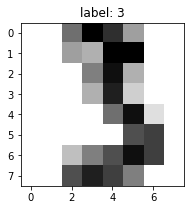

In [5]:
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r,
           interpolation='nearest')
plt.title("label: %d" % digits.target[sample_index]);

> Normaliser les données avec la fonction `preprocessing.scale()` et séparer celles-ci en deux échantillons d'apprentissage et de test. Afficher la dimension des deux jeux de données.

In [74]:
digits.data_nor = preprocessing.scale(digits.data)

X_train_nor, X_test_nor, y_train, y_test = train_test_split(digits.data_nor, digits.target, test_size=0.2)

Les dimensions des deux jeux de données:

In [75]:
print(X_train_nor.shape, y_train.shape)
print(X_test_nor.shape, y_test.shape)

(1437, 64) (1437,)
(360, 64) (360,)


## Feed Forward Neural Network avec Keras

Nous allons maintenant définir et ajuster un modèle à propagation avant (Feed Forward) avec Keras.

#### Pre-processing

La variable de classe (chiffre correspondant) indique le numéro de la catégorie : 

In [8]:
y_train[:3]

array([9, 9, 9])

Avec Keras, pour construire un réseau de neurones adapté à ce problème de la classification multiclasses, il faut préalablement transformer la variable de classe sous la forme "one hot encoding" i.e. transformer la variable de classe en un vecteur indiquant l'appartenance à chacune des classes sous forme d'indicatrices :

In [9]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_train[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### Definition de l'architecture

Nous allons maintenant construire un premier réseau à propagation avant :

In [10]:
from keras.models import Sequential

On importe les fonctionnalités qui permettent de définir, de façon successive, les différentes couches :
- Dense : permet de définir les pré-activations, c'est dans cette couche que se situent les poids et les termes de biais.
- Activation :  permet de définir les fonctions d'activation.

In [11]:
from keras.layers.core import Dense, Activation

Les dimensions du modèle : 

In [12]:
N = X_train_nor.shape[1]  # dimension en entrée
N

64

In [13]:
H = 128 # dimension de la couche cachée
K = 10  # nombre de classes en sortie (autant que de chiffres ici)

On peut maintenant définir l'architecture du réseau :

In [14]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

2022-12-12 13:55:38.828922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 13:55:38.830409: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Il est possible de résumer l'architecture avec la méthode `summary()`:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               8320      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 9,610
Trainable params: 9,610
Non-trainable params: 0
_________________________________________________________________


Le nombre de paramètres est indiqué dans la dernière colonne, notez que seules les couches `dense` contiennent ici des paramètres à ajuster.

Les dimensions en sortie de chaque couche sont de la forme `(None, ...)`. Lorsque le réseau sera ajusté sur un échantillon, la première dimension indiquera la taille de l'échantillon.

Vous pouvez visualiser (dans un fichier .png) l'architecture ainsi. Si vous êtes confronté à des problèmes d'installation (librairies `pydot`, `graphviz` ...), ne perdez pas trop de temps sur cette partie.

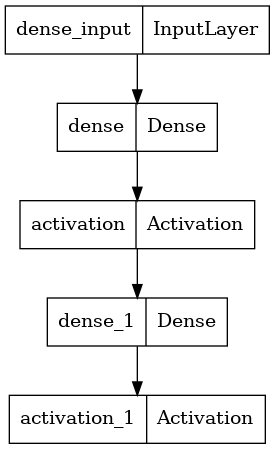

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

#### Poids du réseau

Le contenu (les poids) de chaque couche du réseau est accessible dans la liste `model.layers`. Par exemple pour la premiere couche :

In [17]:
my_first_layer = model.layers[0]

Le tableau contenant les valeurs des poids et les termes de biais de cette première couche sont accessibles avec la méthode `get_weights()`. La méthode renvoie en fait une liste contenant
- le tableau numpy des poids,
- le vecteur des termes de biais.

> Vérifier que le tableau des poids ainsi que les termes de biais possèdent les dimensions attendues compte tenu de ce que nous avons vu dans le `model.summary()` plus haut. Retrouvez le nombre de paramètres affichés dans le `model.summary()`.

In [18]:
print(my_first_layer.get_weights()[0].shape)
print(my_first_layer.get_weights()[1].shape)

(64, 128)
(128,)


> Bien que le réseau n'ait pas encore été ajusté sur des données, vérifier que la définition de l'architecture implique une intialisation immédiate des poids du réseau (i.e. les poids prennent des valeurs). 
> Vérifier aussi que les biais sont initialisés à zéro.

In [19]:
print(my_first_layer.get_weights()[0])
print("###########################")
print(my_first_layer.get_weights()[1])

[[-0.15187335  0.07902656 -0.11580318 ... -0.17666842  0.01212557
   0.1292104 ]
 [-0.09613713  0.00763752 -0.05789299 ... -0.07249679  0.16064341
   0.09018271]
 [ 0.0266497  -0.1639407  -0.05792861 ... -0.09991416 -0.04240967
   0.10689397]
 ...
 [-0.1447761  -0.16178809 -0.05288966 ...  0.00764228 -0.03993949
   0.12054862]
 [-0.0101842  -0.03114559 -0.03521647 ... -0.08687831  0.04740922
   0.08480914]
 [ 0.1325279  -0.02067526  0.11223345 ...  0.17421214  0.00490615
  -0.00212277]]
###########################
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


### Apprentissage : ajustement des poids du réseau

La phase d'apprentissage consiste à estimer le vecteur $\theta$ (qui contient tous les paramètres du réseau : poids et biais) en cherchant à minimiser en $\theta$ le risque empirique (ici sans pénalité) 
$$ \theta \mapsto \frac 1{n} \sum_{i=1}^n  \ell( f(X_i , \theta),Y_i) $$
où $f(\cdot , \theta)$ est la fonction qui correspond au réseau de neurones et où $\ell$ est la perte choisie. Pour le problème de classification multiclasses qui nous intéresse ici il s'agit de la cross-entropy.

On utilise pour cela une méthode d'optimisation de type descente de gradient stochastique, appliquée au risque empirique pénalisé. Par exemple pour `SGD`, chaque itération effectue un pas de gradient, en calculant ce gradient sur un sous-échantillon des données (échantillon batch):
$$ \theta_b  =   \theta_{b-1}  - \varepsilon   \frac 1{|B|} \sum_{i \in B}  \nabla_\theta \ell( f(X_i , \theta_{b-1}),Y_i)   
 $$
où $\varepsilon$ est le taux d'apprentissage (learning rate).

Le module `optimizers` de Keras permet de choisir la méthode d'optimisation. On utilise ci-dessous l'optimiseur `SGD`, avec l'argument `lr` pour régler le taux d'apprentissage :

In [20]:
from keras.optimizers import SGD
sgd = SGD(learning_rate=0.1)

Nous allons maintenant ajuster sur les données digits un réseau de neurones à une couche cachée.

L'ajustement est effectué en deux temps : compilation puis ajustement sur les données.

On spécifie les éléments nécessaires à l'ajustement  avec la méthode  `compile` :
- optimiseur,
- perte considérée pour la back propagation (dans l'algo de descente de gradient)
- "métriques" à considérer pour évaluer l'erreur. On pourrait bien sûr évaluer l'erreur uniquement pour la cross-entropy, mais l'erreur pour la perte sèche $\ell(y,y') = 1_{y \neq y'}$ est plus facile à interpréter, on choisit donc de suivre  aussi la métrique "accuracy" (précision = taux de bien classé) le long de la trajectoire de descente de gradient.

In [21]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Dans les arguments de la méthode `.fit` ci-dessous:
- epochs = nombre de passages sur l'ensemble de l'échantillon  ;
- batch_size = taille du sous-échantillon extrait (batch) pour le calcul du gradient à chaque itération.

In [22]:
model.fit(X_train_nor, Y_train, epochs=10, batch_size=32)

Epoch 1/10
45/45 [==============================] - 0s 3ms/step - loss: 0.9679 - accuracy: 0.7509
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2808 - accuracy: 0.9464
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1750 - accuracy: 0.9680
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1281 - accuracy: 0.9749
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1027 - accuracy: 0.9805
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0836 - accuracy: 0.9847
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.9882
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.9910
Epoch 9/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9951
Epoch 10/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9958


> Chaque ligne correspond à un passage sur l'ensemble des données (= un epoch). Nous avons choisi un batch size de 32 observations. Combien de pas de gradients sont donc effectués par epoch pour ce choix de paramètres ?

Une fois par batch, sachant que les batch sont de taille 32 et qu'on a 1437 données, cela fait 45 batch donc 45 pas de gradient par epoch.

> La perte cross entropy (ici utilisé pour désigner le risque empirique pour la cross entropy) et la précision (accuracy) s'améliorent-elles le long de la trajectoire de descente de gradient ?

Les poids sont enregistrés dans `model.layers`. 

> Les biais sont ils toujours à zero ?

In [23]:
print(model.layers[0].weights[1])

<tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
array([ 0.0570675 ,  0.03784629,  0.04212374,  0.01983578,  0.06265739,
        0.00523509,  0.12847905, -0.0069189 , -0.0080794 ,  0.04273861,
       -0.00507704,  0.00312106,  0.11453386,  0.10320319,  0.00551028,
        0.05015378,  0.06078076,  0.00083639, -0.01321215,  0.10114141,
        0.0492532 ,  0.01166672,  0.02500204,  0.02169731,  0.14383659,
        0.08023933,  0.08444656,  0.05680235,  0.05558059,  0.01435725,
        0.0594171 ,  0.105109  , -0.00557073,  0.01922524,  0.02791766,
        0.01756942, -0.00258398,  0.02578916,  0.06229158,  0.06276581,
       -0.01508986,  0.06258848,  0.13074459,  0.03113909,  0.03504233,
        0.04613224,  0.07842462,  0.05445448,  0.0124143 ,  0.00710012,
        0.07811712,  0.07852615,  0.06913076,  0.05084855,  0.07430197,
        0.02240881,  0.0379095 ,  0.10678857,  0.0989489 ,  0.07771217,
        0.05055454,  0.12770107, -0.01897899, -0.00973226,  0.00020777,
 

> En comparant les valeurs de la perte et de l'accuracy, vérifier (sur les sorties) que si l'on effectue l'ajustement une seconde fois, l'état initial pour le second essai correspond à l'état du réseau précédemment ajusté.

> Essayer de diminuer encore la perte en augmentant le nombre d'épochs, en diminuant le taux d'apprentissage (par exemple 0.001).   
> Remarque : si vous souhaitez réinitialiser les poids, il vous faut "réinstancier" le modèle en le redéfinissant totalement. 

In [29]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_nor, Y_train, epochs=10000, batch_size=32)

Epoch 1/10000
45/45 [==============================] - 0s 4ms/step - loss: 2.4560 - accuracy: 0.1023
Epoch 2/10000
45/45 [==============================] - 0s 4ms/step - loss: 2.3603 - accuracy: 0.1503
Epoch 3/10000
45/45 [==============================] - 0s 3ms/step - loss: 2.2700 - accuracy: 0.1983
Epoch 4/10000
45/45 [==============================] - 0s 4ms/step - loss: 2.1849 - accuracy: 0.2457
Epoch 5/10000
45/45 [==============================] - 0s 3ms/step - loss: 2.1046 - accuracy: 0.3027
Epoch 6/10000
45/45 [==============================] - 0s 10ms/step - loss: 2.0286 - accuracy: 0.3528
Epoch 7/10000
45/45 [==============================] - 0s 9ms/step - loss: 1.9566 - accuracy: 0.4064
Epoch 8/10000
45/45 [==============================] - 0s 8ms/step - loss: 1.8883 - accuracy: 0.4475
Epoch 9/10000
45/45 [==============================] - 0s 4ms/step - loss: 1.8236 - accuracy: 0.4871
Epoch 10/10000
45/45 [==============================] - 0s 3ms/step - loss: 1.7622 - accur

45/45 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9555
Epoch 161/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9562
Epoch 162/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9569
Epoch 163/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2432 - accuracy: 0.9569
Epoch 164/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9569
Epoch 165/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2405 - accuracy: 0.9576
Epoch 166/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9576
Epoch 167/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9576
Epoch 168/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.9582
Epoch 169/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.2354 - acc

45/45 [==============================] - 0s 5ms/step - loss: 0.1317 - accuracy: 0.9805
Epoch 319/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9805
Epoch 320/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9805
Epoch 321/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1306 - accuracy: 0.9805
Epoch 322/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1302 - accuracy: 0.9805
Epoch 323/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9805
Epoch 324/10000
45/45 [==============================] - 0s 7ms/step - loss: 0.1294 - accuracy: 0.9805
Epoch 325/10000
45/45 [==============================] - 0s 11ms/step - loss: 0.1291 - accuracy: 0.9805
Epoch 326/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.9805
Epoch 327/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.1283 - ac

45/45 [==============================] - 0s 2ms/step - loss: 0.0896 - accuracy: 0.9861
Epoch 477/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0895 - accuracy: 0.9861
Epoch 478/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0893 - accuracy: 0.9861
Epoch 479/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9861
Epoch 480/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9861
Epoch 481/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 0.9861
Epoch 482/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9861
Epoch 483/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9861
Epoch 484/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9861
Epoch 485/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0880 - acc

45/45 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9923
Epoch 635/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9923
Epoch 636/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9923
Epoch 637/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9923
Epoch 638/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9923
Epoch 639/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9923
Epoch 640/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9923
Epoch 641/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0663 - accuracy: 0.9923
Epoch 642/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9923
Epoch 643/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0660 - acc

45/45 [==============================] - 0s 2ms/step - loss: 0.0528 - accuracy: 0.9937
Epoch 793/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9937
Epoch 794/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9937
Epoch 795/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9937
Epoch 796/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9937
Epoch 797/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9937
Epoch 798/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9937
Epoch 799/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9937
Epoch 800/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9937
Epoch 801/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0521 - acc

45/45 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9958
Epoch 951/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9958
Epoch 952/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9958
Epoch 953/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9958
Epoch 954/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9958
Epoch 955/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9958
Epoch 956/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9958
Epoch 957/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9958
Epoch 958/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9958
Epoch 959/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0426 - acc

45/45 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9979
Epoch 1108/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0361 - accuracy: 0.9979
Epoch 1109/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9979
Epoch 1110/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9979
Epoch 1111/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9979
Epoch 1112/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9979
Epoch 1113/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9979
Epoch 1114/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9979
Epoch 1115/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9979
Epoch 1116/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9993
Epoch 1264/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9993
Epoch 1265/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9993
Epoch 1266/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9993
Epoch 1267/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9993
Epoch 1268/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9993
Epoch 1269/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9993
Epoch 1270/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9993
Epoch 1271/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9993
Epoch 1272/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 1420/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 1421/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 1422/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 1.0000
Epoch 1423/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 1424/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 1425/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 1426/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 1.0000
Epoch 1427/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 1.0000
Epoch 1428/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 1576/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 1577/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 1578/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 1579/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 1.0000
Epoch 1580/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 1581/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 1582/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 1583/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 1584/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1732/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1733/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1734/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1735/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1736/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 1.0000
Epoch 1737/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 1738/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 1739/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 1.0000
Epoch 1740/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 1888/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 1889/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 1890/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 1891/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 1892/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 1893/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 1894/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 1895/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 1.0000
Epoch 1896/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2044/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2045/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2046/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2047/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2048/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2049/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2050/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0171 - accuracy: 1.0000
Epoch 2051/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 2052/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2200/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2201/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2202/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2203/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2204/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2205/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2206/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2207/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 2208/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2356/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2357/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2358/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2359/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2360/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2361/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2362/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2363/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 1.0000
Epoch 2364/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2512/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2513/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2514/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2515/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2516/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2517/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2518/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2519/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 1.0000
Epoch 2520/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 2668/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 2669/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 2670/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 2671/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 2672/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 2673/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 2674/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 2675/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 2676/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2824/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2825/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2826/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2827/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2828/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2829/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2830/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2831/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 1.0000
Epoch 2832/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2980/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2981/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2982/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2983/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2984/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2985/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2986/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 2987/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 2988/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0

45/45 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3136/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3137/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3138/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3139/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3140/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3141/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3142/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3143/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 3144/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3292/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3293/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3294/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3295/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3296/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3297/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3298/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3299/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 1.0000
Epoch 3300/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3448/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3449/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3450/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3451/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3452/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3453/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3454/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3455/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 3456/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 4ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3604/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3605/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3606/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3607/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3608/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3609/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3610/10000
45/45 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3611/10000
45/45 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 1.0000
Epoch 3612/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3760/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3761/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3762/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3763/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3764/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3765/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3766/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3767/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 3768/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3916/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3917/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3918/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3919/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3920/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3921/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3922/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3923/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 3924/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4072/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4073/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4074/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4075/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4076/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4077/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4078/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4079/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 4080/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4228/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4229/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4230/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4231/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4232/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4233/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4234/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4235/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 4236/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4384/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4385/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4386/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4387/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4388/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4389/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4390/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4391/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 4392/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4540/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4541/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4542/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4543/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4544/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4545/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4546/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4547/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 4548/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4696/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4697/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4698/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4699/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4700/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4701/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4702/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4703/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 4704/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4852/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4853/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4854/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4855/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4856/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4857/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4858/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4859/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 4860/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5008/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5009/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5010/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5011/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5012/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5013/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5014/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5015/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 5016/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5164/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5165/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5166/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5167/10000
45/45 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5168/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5169/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 5170/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 5171/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 5172/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5320/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5321/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5322/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5323/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5324/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5325/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5326/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5327/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 5328/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5476/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5477/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5478/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5479/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5480/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5481/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5482/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5483/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 5484/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5632/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5633/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5634/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5635/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5636/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5637/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5638/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5639/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 5640/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5788/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5789/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5790/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5791/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5792/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5793/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5794/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5795/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 5796/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5944/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5945/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5946/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5947/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5948/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5949/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5950/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5951/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 5952/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6100/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6101/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6102/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6103/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6104/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 6105/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6106/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6107/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Epoch 6108/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6256/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6257/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6258/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6259/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6260/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6261/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6262/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6263/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 6264/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6412/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6413/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6414/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6415/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6416/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6417/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6418/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6419/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 6420/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6568/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6569/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6570/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6571/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6572/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6573/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6574/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6575/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 6576/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6724/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6725/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6726/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6727/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6728/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6729/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6730/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6731/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6732/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6880/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6881/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6882/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6883/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6884/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6885/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6886/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6887/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6888/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7036/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7037/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7038/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7039/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7040/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7041/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7042/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7043/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7044/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7192/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7193/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7194/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7195/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7196/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7197/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7198/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7199/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7200/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7348/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7349/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7350/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7351/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7352/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7353/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7354/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7355/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 7356/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7504/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7505/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7506/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7507/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7508/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7509/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7510/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7511/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 7512/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7660/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7661/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7662/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7663/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7664/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7665/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7666/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7667/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 7668/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7816/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7817/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7818/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7819/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7820/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7821/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7822/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7823/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7824/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7972/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7973/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7974/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7975/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7976/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7977/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7978/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7979/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7980/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8128/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8129/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8130/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8131/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8132/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8133/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8134/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8135/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8136/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8284/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8285/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8286/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8287/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8288/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8289/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8290/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8291/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8292/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8440/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8441/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8442/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8443/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8444/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8445/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8446/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8447/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8448/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8596/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8597/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8598/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8599/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8600/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8601/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8602/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8603/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8604/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8752/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8753/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8754/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8755/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8756/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8757/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8758/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8759/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 8760/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8908/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8909/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8910/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8911/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8912/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8913/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8914/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8915/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 8916/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9064/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9065/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9066/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9067/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9068/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9069/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9070/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9071/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9072/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9220/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9221/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9222/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9223/10000
45/45 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9224/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9225/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9226/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9227/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9228/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9376/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9377/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9378/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9379/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9380/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9381/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9382/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9383/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 9384/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9532/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9533/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9534/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9535/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9536/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9537/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9538/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9539/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9540/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9688/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9689/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9690/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9691/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9692/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9693/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9694/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9695/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 9696/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9844/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9845/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9846/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9847/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9848/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9849/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9850/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9851/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9852/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0

45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10000/10000
45/45 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000


> Que dire de la convergence pour une grande valeur du taux d'apprentissage (par exemple `lr=2`) ?

In [31]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
sgd = SGD(learning_rate=2) 
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_nor, Y_train, epochs=10, batch_size=32)
# acuraccy oscille et les pertes explosent rapidement

Epoch 1/10
45/45 [==============================] - 0s 3ms/step - loss: 214.3531 - accuracy: 0.5094
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 20690.7090 - accuracy: 0.6186
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 825640.3750 - accuracy: 0.6868
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 23858234.0000 - accuracy: 0.6632
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 12413729792.0000 - accuracy: 0.6145
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 1771969970176.0000 - accuracy: 0.5950
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 82519248601088.0000 - accuracy: 0.6521
Epoch 8/10
45/45 [==============================] - 0s 4ms/step - loss: 4546976649576448.0000 - accuracy: 0.6486
Epoch 9/10
45/45 [==============================] - 0s 3ms/step - loss: 220905973512929280.0000 - accuracy: 0.6868
Epoch 10/10
45/45 [==============

> Essayer aussi d'utiliser une méthode `Momentum-SGD` (argument `momentum= True`).  

In [37]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))
sgd = SGD(learning_rate=0.01, momentum = True)  
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_nor, Y_train, epochs=10, batch_size=32)
#on a de pls grandes pertes que pour le sgd de base

Epoch 1/10
45/45 [==============================] - 1s 4ms/step - loss: 0.9680 - accuracy: 0.6987
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2128 - accuracy: 0.9548
Epoch 3/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1934 - accuracy: 0.9645
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2434 - accuracy: 0.9715
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.9722
Epoch 6/10
45/45 [==============================] - 0s 3ms/step - loss: 0.8005 - accuracy: 0.9666
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.7544 - accuracy: 0.9805
Epoch 8/10
45/45 [==============================] - 0s 3ms/step - loss: 1.7102 - accuracy: 0.9798
Epoch 9/10
45/45 [==============================] - 0s 3ms/step - loss: 1.3225 - accuracy: 0.9812
Epoch 10/10
45/45 [==============================] - 0s 3ms/step - loss: 1.3905 - accuracy: 0.9847


### Predictions et erreur de généralisation

> Effectuer des prédictions de votre réseau sur l'échantillon test avec la méthode `.predict()`.

In [53]:
model = Sequential()
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(K))
model.add(Activation("softmax"))

sgd = SGD(learning_rate=0.1)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_nor, Y_train, epochs=10, batch_size=32);


y_predicted = model.predict(X_test_nor)
y_predicted

Epoch 1/10
45/45 [==============================] - 0s 6ms/step - loss: 1.0019 - accuracy: 0.7648
Epoch 2/10
45/45 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.9429
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.9631
Epoch 4/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9743
Epoch 5/10
45/45 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9798
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9882
Epoch 7/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.9903
Epoch 8/10
45/45 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 0.9923
Epoch 9/10
45/45 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9930
Epoch 10/10
12/12 [==============================] - 0s 3ms/step


array([[7.0483315e-05, 1.4602393e-04, 1.9762991e-04, ..., 9.8098034e-01,
        2.2356175e-03, 6.3202293e-03],
       [1.3877354e-04, 3.0345628e-02, 9.6386528e-01, ..., 2.0362163e-04,
        4.3742915e-04, 2.1589093e-04],
       [1.7626715e-07, 8.1203107e-06, 9.9991858e-01, ..., 2.4160786e-07,
        5.9549120e-06, 1.7888807e-06],
       ...,
       [9.9645531e-01, 8.0484119e-07, 8.8060733e-05, ..., 4.0089435e-05,
        1.3054235e-04, 1.5476187e-04],
       [5.3618473e-06, 1.4900812e-02, 1.5167086e-06, ..., 9.9969027e-04,
        1.5763367e-04, 3.7125553e-06],
       [6.8913870e-03, 1.7986269e-04, 1.9237964e-04, ..., 1.5709215e-03,
        5.3331368e-03, 5.2696001e-02]], dtype=float32)

> Pour plusieurs élements de l'échantillon test, renvoyer les probabilités conditionnelles prédites par le réseau (en sortie du Softmax) à l'aide de la méthode `.model.predict()`. La probabilité de la classe choisie est-elle générallement bien supérieure aux probabilités des autres classes ?
Calculer le taux de bien classé sur l'échantillon test.

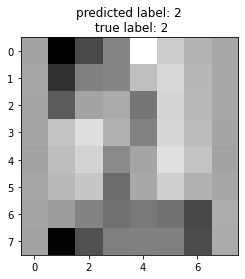

In [51]:
sample_idx = 2
plt.imshow(X_test_nor[sample_idx].reshape(8, 8),
           cmap=plt.cm.gray_r, interpolation='nearest');
plt.title("predicted label: %d\n true label: %d"
              % (np.where(y_predicted[sample_idx] == max(y_predicted[sample_idx]))[0], y_test[sample_idx]));

    

In [54]:
probabilities = y_predicted
probabilities[sample_idx] 

array([1.7626715e-07, 8.1203107e-06, 9.9991858e-01, 5.4781711e-05,
       8.0565218e-07, 8.6118780e-06, 9.4690870e-07, 2.4160786e-07,
       5.9549120e-06, 1.7888807e-06], dtype=float32)

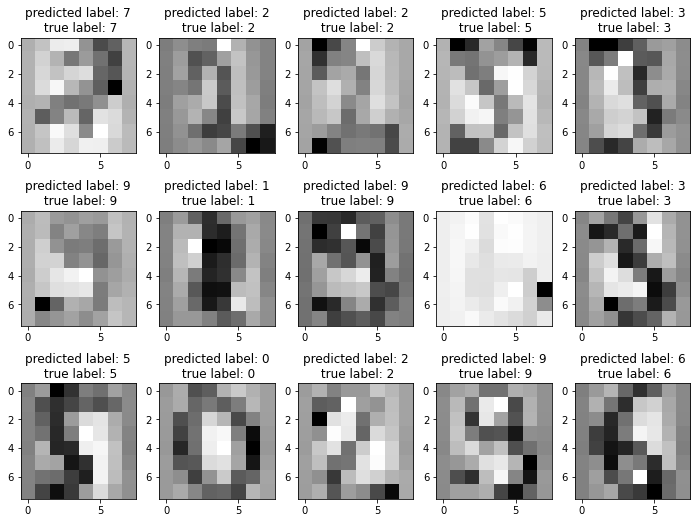

In [56]:
plt.figure(figsize=(12, 9))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test_nor[i].reshape(8, 8),
               cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("predicted label: %d\n true label: %d"
              % (np.where(y_predicted[i] == max(y_predicted[i]))[0], y_test[i]));


In [58]:
succes = 0
for i in range(len(y_test)):
    if np.where(y_predicted[i] == max(y_predicted[i]))[0] == y_test[i]:
        succes += 1
print(f"Taux de succès : {100 * succes / len(y_test)}")

Taux de succès : 96.66666666666667


On rappelle que la perte empirique pour la cross-entropy vaut
\begin{eqnarray*}
\hat{ \mathcal R}_n (\theta)  &=&  \frac 1n  \sum_{i=1}^n  \ell( Y_i,  f(X_i , \theta)) \\ 
& =&   -    \frac 1n \sum_{i=1}^n  \sum_{k = 1}^K  \mathbb{1}_{Y_i =  k}  \log (f(X_i , \theta)_k)  
\end{eqnarray*}


> Calculer ("à la main") le risque empirique (pour la cross entropy) sur l'échantillon test. Le risque était-il plus faible sur l'échantillon d'apprentissage  ?

In [69]:
somme = 0
for i in range(len(y_test)):
    for k in range(1,10):
        if y_test[i] == k:
            somme += np.log(y_predicted[i][k])
somme *= - 1 / len(y_test)
somme

0.13957457817091382

> Plus simplement, on peut utiliser la méthode `.evaluate(x,y)`  pour retrouver la perte empirique et l'accuracy. Ce calcul correspond-il à une passe de propagation avant ou bien à un pas de back-propagation ?

In [76]:
y_test = to_categorical(y_test)
model.evaluate(X_test_nor, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.0544 - accuracy: 0.9861


[0.05438598617911339, 0.9861111044883728]

### Impact de l'initialisation

Nous allons maintenant étudier l'impact de l'initialisation de la méthode SGD sur la convergence de ce dernier.

Dans Keras, par défaut les poids sont initialisés comme suit par l'initialiseur `glorot_uniform` :

- chaque poids est tiré uniformément dans $[-scale, scale]$
- scale est choisi de l'ordre de $\frac{1}{\sqrt{n_{in} + n_{out}}}$

Nous allons étudier l'impact de l'initialisation en considérant des initialiseurs Gaussiens en testant plusieurs valeurs pour la variance.

In [77]:
from keras import initializers
mon_init1 = initializers.RandomNormal(mean=0.0, stddev=0.05)

> Définir un réseau avec une couche Softmax en sortie et deux couches cachées "tanh", avec respectivement H neurones et K neurones. (On utilise ici des activations "tanh" pour que le problème soit un peu plus difficile à résoudre pour le réseau ...)
> Passer l'initialiseur en argument de `Dense()`, ce qui donne par exemple pour la première couche :   
`model.add(Dense(H,input_dim=N,kernel_initializer=mon_init1))`.

In [100]:
model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init1))
model.add(Activation("tanh"))
model.add(Dense(H))
model.add(Activation('tanh'))
model.add(Dense(K))
model.add(Activation("softmax"))



> Ajuster le réseau et afficher l'évolution de la perte (i.e. risque empirique) sur les données d'apprentissage le long de la trajectoire des epochs.

In [101]:

sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)

On peut afficher l'évolution de la perte sur l'apprentissage comme suit :

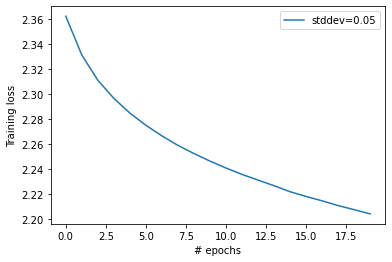

In [102]:
plt.plot(history1.history['loss'],label = "stddev=0.05")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)
plt.legend(loc='best');

> Faire de même avec les initialiseurs suivants :    
> `mon_init2 = initializers.RandomNormal(mean=0.0,stddev=10)`   
> `mon_init3 = initializers.RandomNormal(mean=0.0,stddev=0.001)` \
> `mon_init4 = initializers.glorot_uniform()`    

> Comparer les performance des réseaux ajustés avec ces initialiseurs en représentant les "trajectoires d'apprentissage".

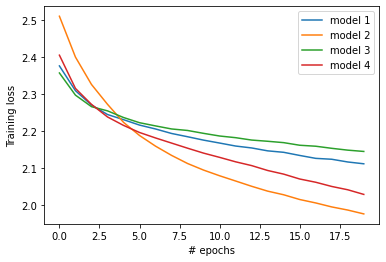

In [95]:
mon_init1 = initializers.RandomNormal(mean=0.0, stddev=0.05)
mon_init2 = initializers.RandomNormal(mean=0.0, stddev=10)
mon_init3 = initializers.RandomNormal(mean=0.0, stddev=0.001)
mon_init4 = initializers.glorot_uniform

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init1))
model.add(Activation("tanh"))
model.add(Dense(K, input_dim = H))
model.add(Activation('tanh'))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)
plt.plot(history1.history['loss'],label = "model 1")

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init2))
model.add(Activation("tanh"))
model.add(Dense(K, input_dim = H))
model.add(Activation('tanh'))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)
plt.plot(history1.history['loss'],label = "model 2")


model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init3))
model.add(Activation("tanh"))
model.add(Dense(K, input_dim = H))
model.add(Activation('tanh'))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)
plt.plot(history1.history['loss'],label = "model 3")

model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init4))
model.add(Activation("tanh"))
model.add(Dense(K, input_dim = H))
model.add(Activation('tanh'))
model.add(Activation("softmax"))
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=20,
                     batch_size=32,verbose=0)
plt.plot(history1.history['loss'],label = "model 4")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
#plt.ylim(0, 6)

plt.legend(loc='best');

Conclusion:
- Initialisation trop proche de zero : gradients trop faibles et SGD peine à sortir de cette zone ...
- Initialisation avec des amplitudes trop élevées : les couches intermédiaires ont des gradients qui s'annulent et difficile là encore de sortir de cette zone

### Early Stopping


L'argument ` validation_split=0.1` dans la méthode `.fit()` permet d'évaluer la perte sur un échantillon de validation. 

> Vérifier graphiquement qu'après un certain nombre d'itérations (quelques centaines epochs ici), le risque et la précision sur l'échantillon de validation  finissent par se dégrader. 

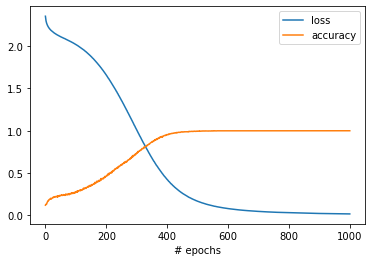

In [109]:
model = Sequential()
model.add(Dense(H, input_dim=N, kernel_initializer = mon_init1))
model.add(Activation("tanh"))
model.add(Dense(H))
model.add(Activation('tanh'))
model.add(Dense(K))
model.add(Activation("softmax"))

sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(X_train_nor, Y_train,epochs=1000,
                     batch_size=32,verbose=0, validation_split = 0.1)
plt.plot(history1.history['loss'], label = "loss")
plt.plot(history1.history['accuracy'], label = 'accuracy')
plt.xlabel('# epochs')

plt.legend(loc='best');

Les réseaux de neurones, même sans parler des architectures "profondes", nécessitent d'ajuster un très grand nombre de paramètres. Il est donc naturel de devoir contrôler la complexité statistique de ces prédicteurs pour en obtenir les meilleurs erreurs de généralisation. 

A chaque pas de la descente de gradient l'ensemble des poids et des biais du réseau est mis à jour. A chaque pas de la descente correspond donc un prédicteur, et au final on dispose donc d'une suite de prédicteurs. Le prédicteur final (du dernier pas de gradient) est certes celui qui minimise le risque empirique (appelée ici perte) mais cela ne signifie évidemment pas que ce prédicteur a les meilleurs performances sur l'échantillon de validation (ou de test).


La méthode classiquement utilisée pour choisir le nombre de pas de gradients est celle du "early stopping".  Le principe consiste tout simplement à stopper la descente de gradient stochastique lorsque l'erreur de validation remonte. L'argument `monitor='val_loss'` de la fonction `EarlyStopping` indique que c'est l'erreur de validation calculée pour la perte (ici cross entropy) qui sera surveillée.

In [105]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Le long d'une trajectoire de descente de gradient, il est possible que la perte remonte ponctuellement sur une itération, avant de redescendre aussitôt. Il est donc préférable de ne prendre la décision d'arrêter la descente de gradient que si cette remontée se confirme sur quelques itérations successives. L'argument `patience=5` impose à la descente de gradient de patienter 5 itérations après une remontée de la perte, avant de prendre la décision d'arrêter  ou non l'algorithme.

In [107]:
model = Sequential()

model.add(Dense(H,input_dim=N, kernel_initializer=mon_init4))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=mon_init4))
model.add(Activation("tanh"))
model.add(Dense(K,kernel_initializer=mon_init4))
model.add(Activation("softmax"))
sgd = SGD(learning_rate=0.1) 

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics = ['accuracy'] )

history = model.fit(X_train_nor, Y_train,epochs=500,
          batch_size=32,verbose=0,
          validation_split=0.1,
          callbacks=[early_stopping])

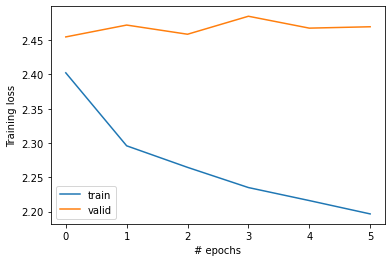

In [108]:
plt.plot(history.history['loss'],label ="train")
plt.plot(history.history['val_loss'],label ="valid")
plt.xlabel('# epochs')
plt.ylabel('Training loss')
plt.legend(loc='best');

> Donner la prédiction du dernier modèle ajusté (par early stopping) sur l'échantillon test `X_test_nor`. Calculer le risque estimé sur les données de test en utilisant la méthode `.evaluate()`. Calculer enfin le taux de mauvais classement sur l'échantillon test.

In [1]:
y_predicted = model.predict(X_test_nor)
print(y_predicted[0])
print(model.evaluate(X_test_nor, y_test))
echec = 0
for i in range(len(y_test)):
    choice_predict = np.where(y_predicted[i] == max(y_predicted[i]))[0]
    choice_test = np.where(y_predicted[i] == 1)[0]
    if choice_predict != choice_test:
        echec += 1
print(f"Taux d'echec : {100 * echec / len(y_test)}")

NameError: name 'model' is not defined

## Application : Données MNIST

Charger les données [handwritten digits MNIST](http://yann.lecun.com/exdb/mnist/) :

In [ ]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()  

height, width, depth = 28, 28, 1 #  28x28 and 1 canal pour le niveau de gris
num_classes = 10

num_train = 60000 
num_test = 10000  

X_train = X_train.reshape(num_train, height * width)  # vecteur 
X_test = X_test.reshape(num_test, height * width) # vecteur 

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')

X_train_nor = X_train / 255 # normalisation dans  [0, 1]  
X_test_nor = X_test / 255 # normalisation dans  [0, 1]  

> Définir et ajuster un réseau de neurones à deux couches cachées. 
> On pourra dans un premier temps choisir les paramètres ci-dessous. 
> On pourra aussi utiliser l'optimiseur adagrad :    
> `adag = keras.optimizers.Adagrad(lr=0.01)`

In [ ]:
batch_size = 128  
num_epochs = 40  
hidden_size = 512  

In [ ]:
### TO DO ###

> En reproduisant les codes proposés sur ce [blog](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/), essayer d'améliorer les performances de votre réseau en choisissant mieux les paramètres par validation croisée à l'aide de la fonction `GridSearchCV` de sckit-learn. Attention, cette validation croisée s'avère très couteuse en temps de calcul...

In [ ]:
### TO DO ###